# Happiness Report:  2015-2022
---

#### Avi Gutman
---

![image](https://raw.githubusercontent.com/avigmn/DataAnalysisCourse/main/Girl_balloons_blog_lg.jpg)

---

The dataset is from the  World Happiness Report - a publication that contains articles and rankings of national happiness,
based on respondent ratings of their own lives.

[link to data source](https://www.kaggle.com/datasets/mayzannilarthein44/world-happiness-report-2015-to-2022)

---

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

###  The Dataset :

In [2]:
url = 'https://raw.githubusercontent.com/avigmn/DataAnalysisCourse/main/world-happiness-report-2015-2022-cleaned.csv'
df_Happy = pd.read_csv(url)
df_Happy.head()

,Unnamed: 0,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2015
2,2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,4,Norway,Western Europe,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [3]:
df_Happy.shape

(1229, 12)

Explanations for the columns :

* `Happiness score`:
It is the national average response to the question of life evaluations.
The question is: “Please imagine a ladder, with steps numbered from 0 at the
bottom to 10 at the top.

* `Economy (GDP per Capita)`:
The statistics of GDP per capita in purchasing power parity at constant 2017 international dollar prices

* `Family (Social Support)`:
The national average of the binary responses (either 0 or 1) to the GWP question: “If you
were in trouble, do you have relatives or friends you can count on to help you
whenever you need them, or not?”

* `Health (Life Expectancy)`:
Healthy life expectancies at birth are based on the data extracted from the World Health Organization’s Global Health Observatory data repository.

* `Freedom`:
The national average of responses to the GWP question: “Are you satisfied or dissatisfied with your freedom to choose what
you do with your life?”


* `Trust (Government Corruption)`:
The measure is the national average of the survey responses to two questions: “Is corruption widespread throughout
the government or not” and “Is corruption widespread within businesses or
not?”

* `Generosity`:
the residual of regressing national average of response to the GWP question:  “Have you donated money to a charity in the past month?”

According to Wikipedia: "each country is also compared against a hypothetical nation called Dystopia. Dystopia represents the lowest national averages for each key variable and is, along with residual error, used as a regression benchmark. The six metrics are used to explain the estimated extent to which each of these factors contribute to increasing life satisfaction when compared to the hypothetical nation of Dystopia, but they themselves do not have an impact on the total score reported for each country".

### Wrangling the data:

First of all, I want to remove the unnecessary column

In [4]:
df_Happy.drop('Unnamed: 0', inplace=True, axis=1)
df_Happy.head()

,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2015
2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,4,Norway,Western Europe,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


### Fixing data types :

In [5]:
df_Happy.dtypes

Happiness Rank                    int64
Country                          object
Region                           object
Happiness Score                  object
Economy (GDP per Capita)         object
Family (Social Support)          object
Health (Life Expectancy)         object
Freedom                          object
Trust (Government Corruption)    object
Generosity                       object
Year                              int64
dtype: object

In [6]:
df_Happy.rename(
    columns={"Happiness Score":"Happiness_Score","Economy (GDP per Capita)":"Economy",'Family (Social Support)':'Family',
            'Health (Life Expectancy)':'Health','Trust (Government Corruption)':'Trust'}
          ,inplace=True)

df_Happy = df_Happy.assign(Happiness_Score = pd.to_numeric(df_Happy['Happiness_Score'].str.replace(',','.') , errors = 'coerce'))
df_Happy = df_Happy.assign(Economy = pd.to_numeric(df_Happy['Economy'].str.replace(',','.') , errors = 'coerce'))
df_Happy = df_Happy.assign(Family = pd.to_numeric(df_Happy['Family'].str.replace(',','.') , errors = 'coerce'))
df_Happy = df_Happy.assign(Health = pd.to_numeric(df_Happy['Health'].str.replace(',','.') , errors = 'coerce'))
df_Happy = df_Happy.assign(Freedom = pd.to_numeric(df_Happy['Freedom'].str.replace(',','.') , errors = 'coerce'))
df_Happy = df_Happy.assign(Trust = pd.to_numeric(df_Happy['Trust'].str.replace(',','.') , errors = 'coerce'))
df_Happy = df_Happy.assign(Generosity = pd.to_numeric(df_Happy['Generosity'].str.replace(',','.') , errors = 'coerce'))

df_Happy['Country'] = df_Happy['Country'].astype(str)
df_Happy['Region'] = df_Happy['Region'].astype(str)

df_Happy.dtypes

Happiness Rank       int64
Country             object
Region              object
Happiness_Score    float64
Economy            float64
Family             float64
Health             float64
Freedom            float64
Trust              float64
Generosity         float64
Year                 int64
dtype: object

### Treat missing or incorrect values :

In [7]:
df_Happy.duplicated().sum()

0

In [8]:
pd.isnull(df_Happy).sum()

Happiness Rank     0
Country            0
Region             0
Happiness_Score    0
Economy            0
Family             0
Health             0
Freedom            0
Trust              0
Generosity         0
Year               0
dtype: int64

#### correcting regions and countries data :

A lot of regions and countries names are missing or spelled incorrectly

In [9]:
df_Happy['Region'].value_counts()

Sub-Saharan Africa                    283
Central and Eastern Europe            202
Latin America and Caribbean           166
Western Europe                        164
Middle East and Northern Africa       108
Southeastern Asia                      53
-                                      46
Southern Asia                          41
Middle East and North Africa           34
Eastern Asia                           32
Commonwealth of Independent States     24
Southeast Asia                         18
South Asia                             14
Australia and New Zealand              12
North America                          12
East Asia                              12
North America and ANZ                   8
Name: Region, dtype: int64

In [10]:
for i in df_Happy.index:
    if '*' in df_Happy.iloc[i , 1]:
        df_Happy.iloc[i , 1] = df_Happy.iloc[i , 1][:-1]


for i in df_Happy.index:
    if (df_Happy.iloc[i , 1] == 'Australia') | (df_Happy.iloc[i , 1] == 'New Zealand'):
        df_Happy.at[i,'Region']='Australia and New Zealand'
    if (df_Happy.iloc[i , 1] == 'Canada') | (df_Happy.iloc[i , 1] == 'United States'):
        df_Happy.at[i,'Region']='North America'
    if df_Happy.iloc[i , 1] in (df_Happy.loc[(df_Happy['Region'] == 'Commonwealth of Independent States')].Country.unique()) :
        df_Happy.at[i,'Region']='Commonwealth of Independent States'
    if (df_Happy.iloc[i , 2] == 'Middle East and North Africa') :
        df_Happy.at[i,'Region']='Middle East and Northern Africa'
    if (df_Happy.iloc[i , 2] == 'South Asia') :
        df_Happy.at[i,'Region']='Southern Asia'
    if (df_Happy.iloc[i , 2] == 'East Asia') :
        df_Happy.at[i,'Region']='Eastern Asia'    
    if (df_Happy.iloc[i , 2] == 'Southeast Asia') :
        df_Happy.at[i,'Region']='Southeastern Asia'
    if (df_Happy.iloc[i , 1] == 'Taiwan Province of China') :
        df_Happy.at[i,'Country']='Taiwan'
    if ((df_Happy.iloc[i , 1] == 'Hong Kong S.A.R. of China') | (df_Happy.iloc[i , 1] == 'Hong Kong S.A.R., China')) :
        df_Happy.at[i,'Country']='Hong Kong'
    if ((df_Happy.iloc[i , 1] == 'Eswatini, Kingdom of') | (df_Happy.iloc[i , 1] == 'Swaziland')) :
        df_Happy.at[i,'Country']='Eswatini'
    if df_Happy.iloc[i , 1] == 'Trinidad & Tobago' :
        df_Happy.at[i,'Country']='Trinidad and Tobago'   
    if (df_Happy.iloc[i , 1] == 'Congo'):
        df_Happy.at[i,'Country']='Congo (Brazzaville)'
    if (df_Happy.iloc[i , 1] == 'Czechia'):
        df_Happy.at[i,'Country']='Czech Republic'
    if (df_Happy.iloc[i , 1] == 'Northern Cyprus'):
        df_Happy.at[i,'Country']='North Cyprus'
    if (df_Happy.iloc[i , 1] == 'Somaliland region'): 
        df_Happy.at[i,'Country']='Somaliland Region'
    if (df_Happy.iloc[i , 1] == 'Macedonia'): 
        df_Happy.at[i,'Country']='North Macedonia'
    
df_Happy['Region'].value_counts()

Sub-Saharan Africa                    283
Latin America and Caribbean           166
Western Europe                        164
Middle East and Northern Africa       142
Central and Eastern Europe            133
Commonwealth of Independent States     96
Southeastern Asia                      71
Southern Asia                          55
Eastern Asia                           44
-                                      43
North America                          16
Australia and New Zealand              16
Name: Region, dtype: int64

In [11]:
regWithComma = df_Happy.loc[(df_Happy['Region'] == '-')]
regWithComma.Country    

347                      Taiwan
364                      Belize
385                   Hong Kong
407                     Somalia
425                     Namibia
461                 South Sudan
506         Trinidad and Tobago
517                      Belize
526                North Cyprus
566                     Somalia
587                     Namibia
622                 South Sudan
663         Trinidad and Tobago
688                North Cyprus
708             North Macedonia
736                     Somalia
737                     Namibia
744                      Gambia
780                 South Sudan
1088                 Luxembourg
1100             Czech Republic
1108                     Taiwan
1121                  Guatemala
1132                     Kuwait
1161               North Cyprus
1163                  Hong Kong
1168                      Libya
1171            North Macedonia
1175                     Gambia
1179                    Liberia
1181        Congo (Brazzaville)
1186    

In [12]:
cntryd_Dict = {}
for i in df_Happy.index :
    if df_Happy.iloc[i , 2] != '-' :
        cntryd_Dict[df_Happy.iloc[i , 1]] = df_Happy.iloc[i , 2]   

for i in df_Happy.index :
    if df_Happy.iloc[i , 2] == '-' :
        try:
            df_Happy.at[i,'Region'] = cntryd_Dict[df_Happy.iloc[i , 1]]
        except:
            continue
            
df_Happy['Region'].value_counts()

Sub-Saharan Africa                    306
Latin America and Caribbean           171
Western Europe                        168
Middle East and Northern Africa       146
Central and Eastern Europe            136
Commonwealth of Independent States     96
Southeastern Asia                      71
Southern Asia                          55
Eastern Asia                           48
North America                          16
Australia and New Zealand              16
Name: Region, dtype: int64

In [13]:
df_Happy.loc[(df_Happy['Region'] == '-')]

,Happiness Rank,Country,Region,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Year


In [14]:
cntry_nums = df_Happy.groupby(['Country'])['Year'].count().reset_index()
cntry_nums.loc[(cntry_nums['Year'] != 8)].sort_values('Year' , ascending = False)

,Country,Year
155,United Arab Emirates,7
78,Laos,7
22,Burundi,7
101,Namibia,7
99,Mozambique,7
81,Lesotho,7
57,Haiti,7
31,Comoros,6
33,Congo (Kinshasa),6
149,Trinidad and Tobago,6


We see that there are no duplicates in the countries, and also that there are coutries that were not tested all the years.

### Understand the data :

First of all, let's check which region is the happiest

In [15]:
grpRegGnrl = df_Happy.groupby(['Region'])['Happiness_Score'].mean().reset_index()
grpRegGnrl.sort_values('Happiness_Score' , ascending=False ,inplace=True)
grpRegGnrl

,Region,Happiness_Score
0,Australia and New Zealand,7.268150
6,North America,7.123419
10,Western Europe,6.801593
4,Latin America and Caribbean,5.996950
1,Central and Eastern Europe,5.709014
3,Eastern Asia,5.707398
7,Southeastern Asia,5.362723
2,Commonwealth of Independent States,5.338064
5,Middle East and Northern Africa,5.281423
8,Southern Asia,4.515184


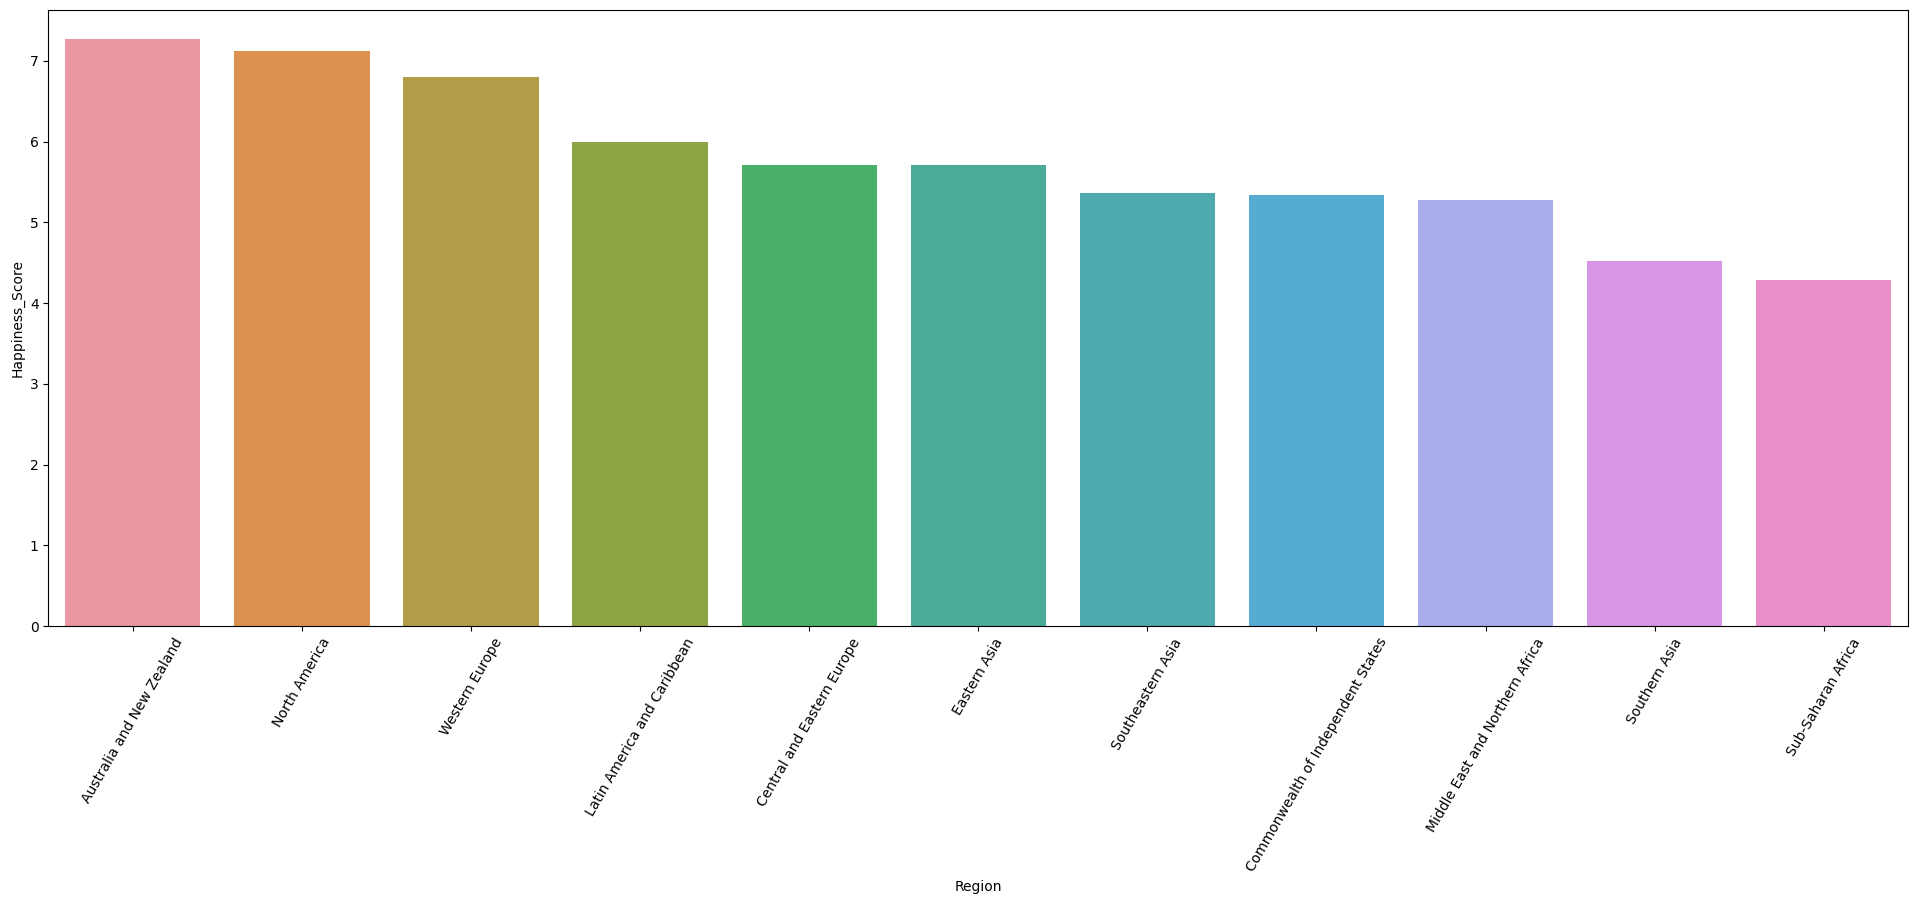

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=1 ,figsize=(24, 8))
sns.barplot(data = grpRegGnrl, x='Region', y='Happiness_Score')
plt.xticks(rotation=60)
plt.show()

Slicing the data by years, for later useage :

In [17]:
df_Happy15 = df_Happy[df_Happy.loc[:,'Year'] == 2015]
df_Happy16 = df_Happy[df_Happy.loc[:,'Year'] == 2016]
df_Happy17 = df_Happy[df_Happy.loc[:,'Year'] == 2017]
df_Happy18 = df_Happy[df_Happy.loc[:,'Year'] == 2018]
df_Happy19 = df_Happy[df_Happy.loc[:,'Year'] == 2019]
df_Happy20 = df_Happy[df_Happy.loc[:,'Year'] == 2020]
df_Happy21 = df_Happy[df_Happy.loc[:,'Year'] == 2021]
df_Happy22 = df_Happy[df_Happy.loc[:,'Year'] == 2022]

#### Correlation :

Now, I'll check the correlation between the six factors and the `Happy Score` :

<AxesSubplot: >

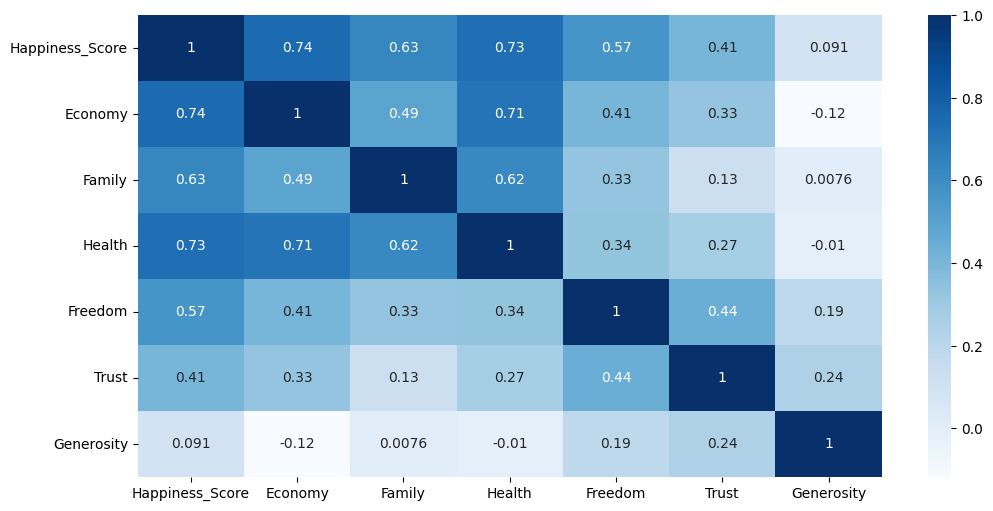

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=1 ,figsize=(12, 6))
corrMtrx=df_Happy[['Happiness_Score', 'Economy','Family','Health','Freedom','Trust','Generosity']].corr(method='pearson')
sns.heatmap(data=corrMtrx , cmap='Blues' , annot=True)

* So we can see that the best correlation with the Happiness score is the `Economy (GDP per Capita)` factor wich is 0.74. 

  After that we can see the `Health (Life Expectancy)` factor with 0.73, and the `Family (Social Support)`     factor with 0.63.

* The correlation beteen `Health (Life Expectancy)` and `Economy (GDP per Capita)` is also high - 0.71,
  and between `Health (Life Expectancy)` and `Family (Social Support)` is 0.62.

* We can also see that `Trust (Government Corruption)` and `Freedom` have relatively low correlation!

In wider prespective, These results are make sense according to **Maslow's Hierarchy of Needs**!

![Maslow's_Hierarchy_of_Needs](https://raw.githubusercontent.com/avigmn/DataAnalysisCourse/main/Maslows-hierarchy-of-needs.jpg)

According to Maslow, the most important factor for Human is Physiological needs, which includes subfactors like
food.

After that comes factors of safe and secure (health, family support), after that comes the Social needs, and finally Aesthetic needs like Generosity.

#### most happy / unhappy :

which country ranked as the happiest every year :

In [19]:
most_Happy = df_Happy.loc[(df_Happy['Happiness Rank'] == 1)]
most_Happy[['Happiness Rank','Country','Happiness_Score','Year']]

,Happiness Rank,Country,Happiness_Score,Year
0,1,Switzerland,7.5870,2015
158,1,Denmark,7.5260,2016
315,1,Norway,7.5370,2017
470,1,Finland,7.6320,2018
625,1,Finland,7.7690,2019
781,1,Finland,7.8087,2020
934,1,Finland,7.8420,2021
1083,1,Finland,7.8210,2022


The country that marked as the happiest country, for the most times is Finland, Which is not a big surprise..

Now the most unhappy :

In [20]:
listOfLast=[]
for i in range(2015,2023) :
    temp = df_Happy.loc[(df_Happy.Year == i)].tail(1).Country.tolist()
    listOfLast.append(temp[0])
columns_list = [listOfLast,range (2015,2023)]
dfLast = pd.DataFrame (columns_list).transpose()
dfLast.columns = ['Country' , 'Year']
dfLast

,Country,Year
0,Togo,2015
1,Burundi,2016
2,Central African Republic,2017
3,Burundi,2018
4,South Sudan,2019
5,Afghanistan,2020
6,Afghanistan,2021
7,Afghanistan,2022


We accepted that in the last few years, the country that receives the dubious honor of the most *unhappier* country is `Afghanistan`.
It's also very logical, consider of The constant terror, the American departure and The Taliban takeover. 

In [21]:
df_Happy.tail(1)

,Happiness Rank,Country,Region,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Year
1228,146,Afghanistan,Southern Asia,2.404,0.758,0.0,0.289,0.0,0.005,0.089,2022


In [22]:
df_Happy[df_Happy['Country'] == 'Afghanistan']

,Happiness Rank,Country,Region,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Year
152,153,Afghanistan,Southern Asia,3.5750,0.319820,0.302850,0.303350,0.23414,0.097190,0.365100,2015
311,154,Afghanistan,Southern Asia,3.3600,0.382270,0.110370,0.173440,0.16430,0.071120,0.312680,2016
455,141,Afghanistan,Southern Asia,3.7940,0.401477,0.581543,0.180747,0.10618,0.061158,0.311871,2017
613,145,Afghanistan,Southern Asia,3.6320,0.332000,0.537000,0.255000,0.08500,0.036000,0.191000,2018
778,154,Afghanistan,Southern Asia,3.2030,0.350000,0.517000,0.361000,0.00000,0.025000,0.158000,2019
933,153,Afghanistan,Southern Asia,2.5669,0.300706,0.356434,0.266052,0.00000,0.001226,0.135235,2020
1082,149,Afghanistan,Southern Asia,2.5230,0.370000,0.000000,0.126000,0.00000,0.010000,0.122000,2021
1228,146,Afghanistan,Southern Asia,2.4040,0.758000,0.000000,0.289000,0.00000,0.005000,0.089000,2022


* Interesting point- the ranks for `Freedom` and for `Family (Social Support)` are **0.0** , what means that it's the country with the lowest means for these factors, too! 
  
  The rank for `Trust (Government Corruption)` is also close to zero.

#### Factors :

Now, I want to see details about the other factors, and examine the results.

I chose to work with the 2022 data:

The `Economy` , `Family` and `Generosity` factors gave no intresting knowledge.

##### Health (Life Expectancy) :

In [23]:
hlth22=df_Happy22.sort_values(by=['Health'] , ascending=False).head(10)
hlth22[['Country','Health']]

,Country,Health
1163,Hong Kong,0.942
1136,Japan,0.866
1109,Singapore,0.851
1141,South Korea,0.841
1086,Switzerland,0.822
1161,North Cyprus,0.819
1123,Cyprus,0.819
1091,Israel,0.818
1102,France,0.808
1111,Spain,0.808


But here we saw that Israel marked at high place in the Health (Life Expectancy) factor! 

It's very interesting, so I will refer to it later.

##### Freedom :

In [24]:
Frdm22=df_Happy22.sort_values(by=['Freedom'] , ascending=False).head(10)
Frdm22[['Country','Freedom']]

,Country,Freedom
1196,Cambodia,0.740
1083,Finland,0.736
1090,Norway,0.728
1089,Sweden,0.724
1084,Denmark,0.719
1085,Iceland,0.718
1135,Uzbekistan,0.716
1159,Vietnam,0.707
1106,United Arab Emirates,0.702
1088,Luxembourg,0.700


Here there is interesting fact. Cambodia was rank as the country with the highest freedom rank. Is it possible?
I tried to check about it, but havn't find A plausible explanation.

on the contrary,  according to Wikipedia:  "On 3 August 2022, the United Nations outlined Cambodia’s increasing lack of press freedom and freedom of expression". (https://en.wikipedia.org/wiki/Human_rights_in_Cambodia)

So, I will check if it is just temporarily mistake in 2022 report, or it is a repeating fact:

In [25]:
cmbdRankLst=[]
cmbdFrdmLst=[]

cmbdTemp=df_Happy15.sort_values(by=['Freedom'] , ascending=False).head(3).reset_index()
cmbdRankLst.append(int(cmbdTemp.loc[(cmbdTemp.Country == 'Cambodia')].index.to_list()[0])+1)
cmbdFrdmLst.append(float(cmbdTemp.loc[(cmbdTemp.Country == 'Cambodia')].Freedom.to_list()[0]))

cmbdTemp=df_Happy16.sort_values(by=['Freedom'] , ascending=False).head(3).reset_index()
cmbdRankLst.append(int(cmbdTemp.loc[(cmbdTemp.Country == 'Cambodia')].index.to_list()[0])+1)
cmbdFrdmLst.append(float(cmbdTemp.loc[(cmbdTemp.Country == 'Cambodia')].Freedom.to_list()[0]))

cmbdTemp=df_Happy17.sort_values(by=['Freedom'] , ascending=False).head(3).reset_index()
cmbdRankLst.append(int(cmbdTemp.loc[(cmbdTemp.Country == 'Cambodia')].index.to_list()[0])+1)
cmbdFrdmLst.append(float(cmbdTemp.loc[(cmbdTemp.Country == 'Cambodia')].Freedom.to_list()[0]))

cmbdTemp=df_Happy18.sort_values(by=['Freedom'] , ascending=False).head(3).reset_index()
cmbdRankLst.append(int(cmbdTemp.loc[(cmbdTemp.Country == 'Cambodia')].index.to_list()[0])+1)
cmbdFrdmLst.append(float(cmbdTemp.loc[(cmbdTemp.Country == 'Cambodia')].Freedom.to_list()[0]))

cmbdTemp=df_Happy19.sort_values(by=['Freedom'] , ascending=False).head(3).reset_index()
cmbdRankLst.append(int(cmbdTemp.loc[(cmbdTemp.Country == 'Cambodia')].index.to_list()[0])+1)
cmbdFrdmLst.append(float(cmbdTemp.loc[(cmbdTemp.Country == 'Cambodia')].Freedom.to_list()[0]))

cmbdTemp=df_Happy20.sort_values(by=['Freedom'] , ascending=False).head(3).reset_index()
cmbdRankLst.append(int(cmbdTemp.loc[(cmbdTemp.Country == 'Cambodia')].index.to_list()[0])+1)
cmbdFrdmLst.append(float(cmbdTemp.loc[(cmbdTemp.Country == 'Cambodia')].Freedom.to_list()[0]))

cmbdTemp=df_Happy21.sort_values(by=['Freedom'] , ascending=False).head(3).reset_index()
cmbdRankLst.append(int(cmbdTemp.loc[(cmbdTemp.Country == 'Cambodia')].index.to_list()[0])+1)
cmbdFrdmLst.append(float(cmbdTemp.loc[(cmbdTemp.Country == 'Cambodia')].Freedom.to_list()[0]))

cmbdTemp=df_Happy22.sort_values(by=['Freedom'] , ascending=False).head(3).reset_index()
cmbdRankLst.append(int(cmbdTemp.loc[(cmbdTemp.Country == 'Cambodia')].index.to_list()[0])+1)
cmbdFrdmLst.append(float(cmbdTemp.loc[(cmbdTemp.Country == 'Cambodia')].Freedom.to_list()[0]))


columns_list = [['Cambodia']*len(range(2015,2023)) , cmbdRankLst , cmbdFrdmLst , range (2015,2023)]
cmbdFrdmDf = pd.DataFrame (columns_list).transpose()
cmbdFrdmDf.columns = ['Country' , 'Rate' ,'Freedom' , 'Year']
cmbdFrdmDf

,Country,Rate,Freedom,Year
0,Cambodia,3,0.66246,2015
1,Cambodia,3,0.58852,2016
2,Cambodia,3,0.633376,2017
3,Cambodia,2,0.696,2018
4,Cambodia,2,0.609,2019
5,Cambodia,2,0.67494,2020
6,Cambodia,3,0.702,2021
7,Cambodia,1,0.74,2022


As we all see - it is a repeating fact.

For my opinion- it appears that there is a repeating mistake in the reports. Maybe the data isn't collecting appropriately there, but it is just my guess.

##### Trust (Government Corruption) :

In [26]:
Trst22=df_Happy22.sort_values(by=['Trust'] , ascending=False).head(10)
Trst22[['Country' ,'Trust']]

,Country,Trust
1109,Singapore,0.587
1225,Rwanda,0.544
1083,Finland,0.534
1084,Denmark,0.532
1089,Sweden,0.512
1092,New Zealand,0.483
1090,Norway,0.474
1086,Switzerland,0.461
1087,Netherlands,0.419
1095,Ireland,0.408


Here too, we see a  very surprising fact- Rwanda got the second highest rank at the `Trust (Government Corruption)` !

It's surprising because at the 90's a genocide took place there..

Let's check again if it is an ongoing matter:

In [27]:
RwndaRankLst=[]
RwndaTrstLst=[]

RwndaTemp=df_Happy15.sort_values(by=['Trust'] , ascending=False).head(3).reset_index()
RwndaRankLst.append(int(RwndaTemp.loc[(RwndaTemp.Country == 'Rwanda')].index.to_list()[0])+1)
RwndaTrstLst.append(float(RwndaTemp.loc[(RwndaTemp.Country == 'Rwanda')].Trust.to_list()[0]))

RwndaTemp=df_Happy16.sort_values(by=['Trust'] , ascending=False).head(3).reset_index()
RwndaRankLst.append(int(RwndaTemp.loc[(RwndaTemp.Country == 'Rwanda')].index.to_list()[0])+1)
RwndaTrstLst.append(float(RwndaTemp.loc[(RwndaTemp.Country == 'Rwanda')].Trust.to_list()[0]))

RwndaTemp=df_Happy17.sort_values(by=['Trust'] , ascending=False).head(3).reset_index()
RwndaRankLst.append(int(RwndaTemp.loc[(RwndaTemp.Country == 'Rwanda')].index.to_list()[0])+1)
RwndaTrstLst.append(float(RwndaTemp.loc[(RwndaTemp.Country == 'Rwanda')].Trust.to_list()[0]))

RwndaTemp=df_Happy18.sort_values(by=['Trust'] , ascending=False).head(3).reset_index()
RwndaRankLst.append(int(RwndaTemp.loc[(RwndaTemp.Country == 'Rwanda')].index.to_list()[0])+1)
RwndaTrstLst.append(float(RwndaTemp.loc[(RwndaTemp.Country == 'Rwanda')].Trust.to_list()[0]))

RwndaTemp=df_Happy19.sort_values(by=['Trust'] , ascending=False).head(3).reset_index()
RwndaRankLst.append(int(RwndaTemp.loc[(RwndaTemp.Country == 'Rwanda')].index.to_list()[0])+1)
RwndaTrstLst.append(float(RwndaTemp.loc[(RwndaTemp.Country == 'Rwanda')].Trust.to_list()[0]))

RwndaTemp=df_Happy20.sort_values(by=['Trust'] , ascending=False).head(3).reset_index()
RwndaRankLst.append(int(RwndaTemp.loc[(RwndaTemp.Country == 'Rwanda')].index.to_list()[0])+1)
RwndaTrstLst.append(float(RwndaTemp.loc[(RwndaTemp.Country == 'Rwanda')].Trust.to_list()[0]))

RwndaTemp=df_Happy21.sort_values(by=['Trust'] , ascending=False).head(3).reset_index()
RwndaRankLst.append(int(RwndaTemp.loc[(RwndaTemp.Country == 'Rwanda')].index.to_list()[0])+1)
RwndaTrstLst.append(float(RwndaTemp.loc[(RwndaTemp.Country == 'Rwanda')].Trust.to_list()[0]))

RwndaTemp=df_Happy22.sort_values(by=['Trust'] , ascending=False).head(3).reset_index()
RwndaRankLst.append(int(RwndaTemp.loc[(RwndaTemp.Country == 'Rwanda')].index.to_list()[0])+1)
RwndaTrstLst.append(float(RwndaTemp.loc[(RwndaTemp.Country == 'Rwanda')].Trust.to_list()[0]))


columns_list = [['Rwanda']*len(range(2015,2023)) , RwndaRankLst , RwndaTrstLst , range (2015,2023)]
RwndaTrstDf = pd.DataFrame (columns_list).transpose()
RwndaTrstDf.columns = ['Country' , 'Rate' ,'Trust' , 'Year']
RwndaTrstDf

,Country,Rate,Trust,Year
0,Rwanda,1,0.55191,2015
1,Rwanda,1,0.50521,2016
2,Rwanda,2,0.45522,2017
3,Rwanda,2,0.444,2018
4,Rwanda,2,0.411,2019
5,Rwanda,3,0.485542,2020
6,Rwanda,2,0.493,2021
7,Rwanda,2,0.544,2022


It is also an repeating matter.

So, I sat and checked about this, and there are some possible explanations:

1. This is a mistake.

2. Following what happend there in the 90's - they did and still doing their best so this situation won't return again:
   1. They established a constitution at 2003, and in it they emphasized the need for national unity, equality between the ethnic groups, respect for human rights and the rule of law.
   2. The constitution does not recognize any discrimination and prohibits the existence of ethnic parties.
   3. Special emphasis, practical and declarative, is given in the Rwandan constitution to gender equality: At 2004 election- the relative proportion of women in the House of Representatives is the highest in the world (http://archive.ipu.org/news-e/12-7.htm).
   
The main information is from Wikipedia - https://he.wikipedia.org/wiki/%D7%A8%D7%95%D7%90%D7%A0%D7%93%D7%94 .
   

### So, what about Israel ?

![Israel](https://raw.githubusercontent.com/avigmn/DataAnalysisCourse/main/israel.jpg)

In [28]:
df_Happy.loc[(df_Happy['Country'] == 'Israel')]

,Happiness Rank,Country,Region,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Year
10,11,Israel,Middle East and Northern Africa,7.2780,1.228570,1.223930,0.913870,0.413190,0.077850,0.331720,2015
168,11,Israel,Middle East and Northern Africa,7.2670,1.337660,0.995370,0.849170,0.364320,0.087280,0.322880,2016
325,11,Israel,Middle East and Northern Africa,7.2130,1.375382,1.376290,0.838404,0.405989,0.085242,0.330083,2017
488,19,Israel,Middle East and Northern Africa,6.8140,1.301000,1.559000,0.883000,0.533000,0.272000,0.354000,2018
637,13,Israel,Middle East and Northern Africa,7.1390,1.276000,1.455000,1.029000,0.371000,0.082000,0.261000,2019
794,14,Israel,Middle East and Northern Africa,7.1286,1.216464,1.403257,1.008053,0.420699,0.099898,0.266862,2020
945,12,Israel,Middle East and Northern Africa,7.1570,1.376000,1.074000,0.788000,0.509000,0.119000,0.208000,2021
1091,9,Israel,Middle East and Northern Africa,7.3640,1.826000,1.221000,0.818000,0.568000,0.143000,0.155000,2022


(0.0, 158.0)

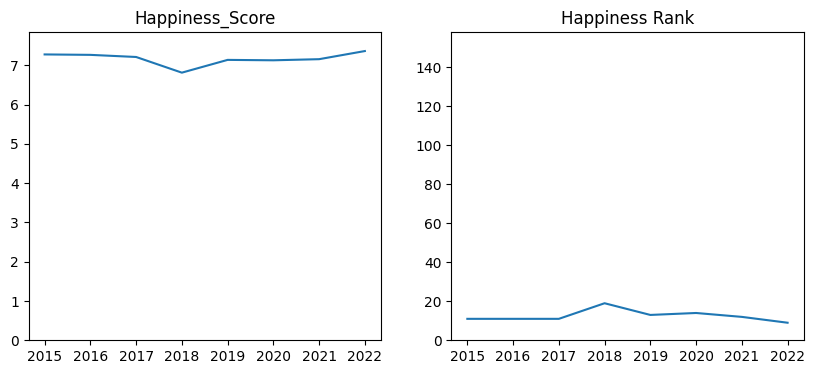

In [29]:
hapScrIl=df_Happy.loc[(df_Happy['Country'] == 'Israel')][['Happiness_Score']]
hapScrIlLst = hapScrIl.Happiness_Score.tolist()

hapRnkIl=df_Happy.loc[(df_Happy['Country'] == 'Israel')][['Happiness Rank']]
hapRnkIlLst = hapRnkIl['Happiness Rank'].tolist()

maxScore = df_Happy.Happiness_Score.max()
maxNumOfCountries = df_Happy['Happiness Rank'].max()

Years=range(2015,2023)

fig, axes = plt.subplots(nrows=1, ncols=2 ,figsize=(10, 4))
axes[0].plot(Years, hapScrIlLst)
axes[1].plot(Years, hapRnkIlLst)

axes[0].title.set_text('Happiness_Score')
axes[1].title.set_text('Happiness Rank')

axes[0].set_ylim([0, maxScore])
axes[1].set_ylim([0, maxNumOfCountries])

First of all, we can be proud !

Israel is placed in a very good place in all measured years:
We can see it from the above graphs, in which the information is relative to all countries.


Now, I want to analyze two subjects:
1. What happend at 2018, when we got the lower rank.
2. What caused us to get our best rank this year (2022).

#### 1.

(0.0, 158.0)

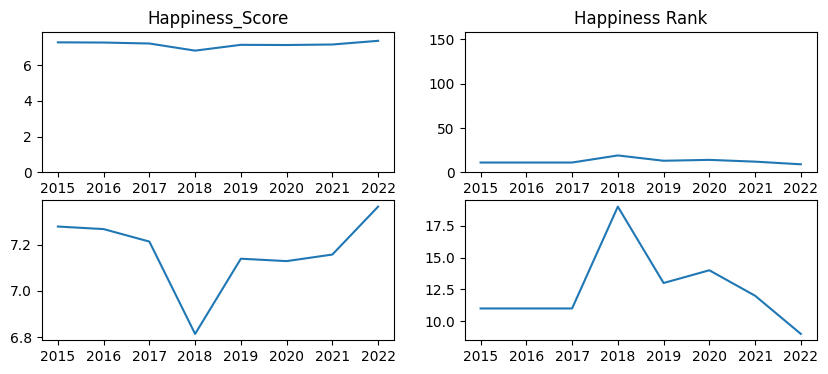

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2 ,figsize=(10, 4))
axes[0,0].plot(Years, hapScrIlLst)
axes[0,1].plot(Years, hapRnkIlLst)
axes[1,0].plot(Years, hapScrIlLst)
axes[1,1].plot(Years, hapRnkIlLst)

axes[0,0].title.set_text('Happiness_Score')
axes[0,1].title.set_text('Happiness Rank')


axes[0,0].set_ylim([0, maxScore])
axes[0,1].set_ylim([0, maxNumOfCountries])

Here I added also graphs in which the information is relative to Israel measures only.
We can see the trends more brightly now.

Maybe the reason is that Israel got lower ranks at 2018?

Let's check it :

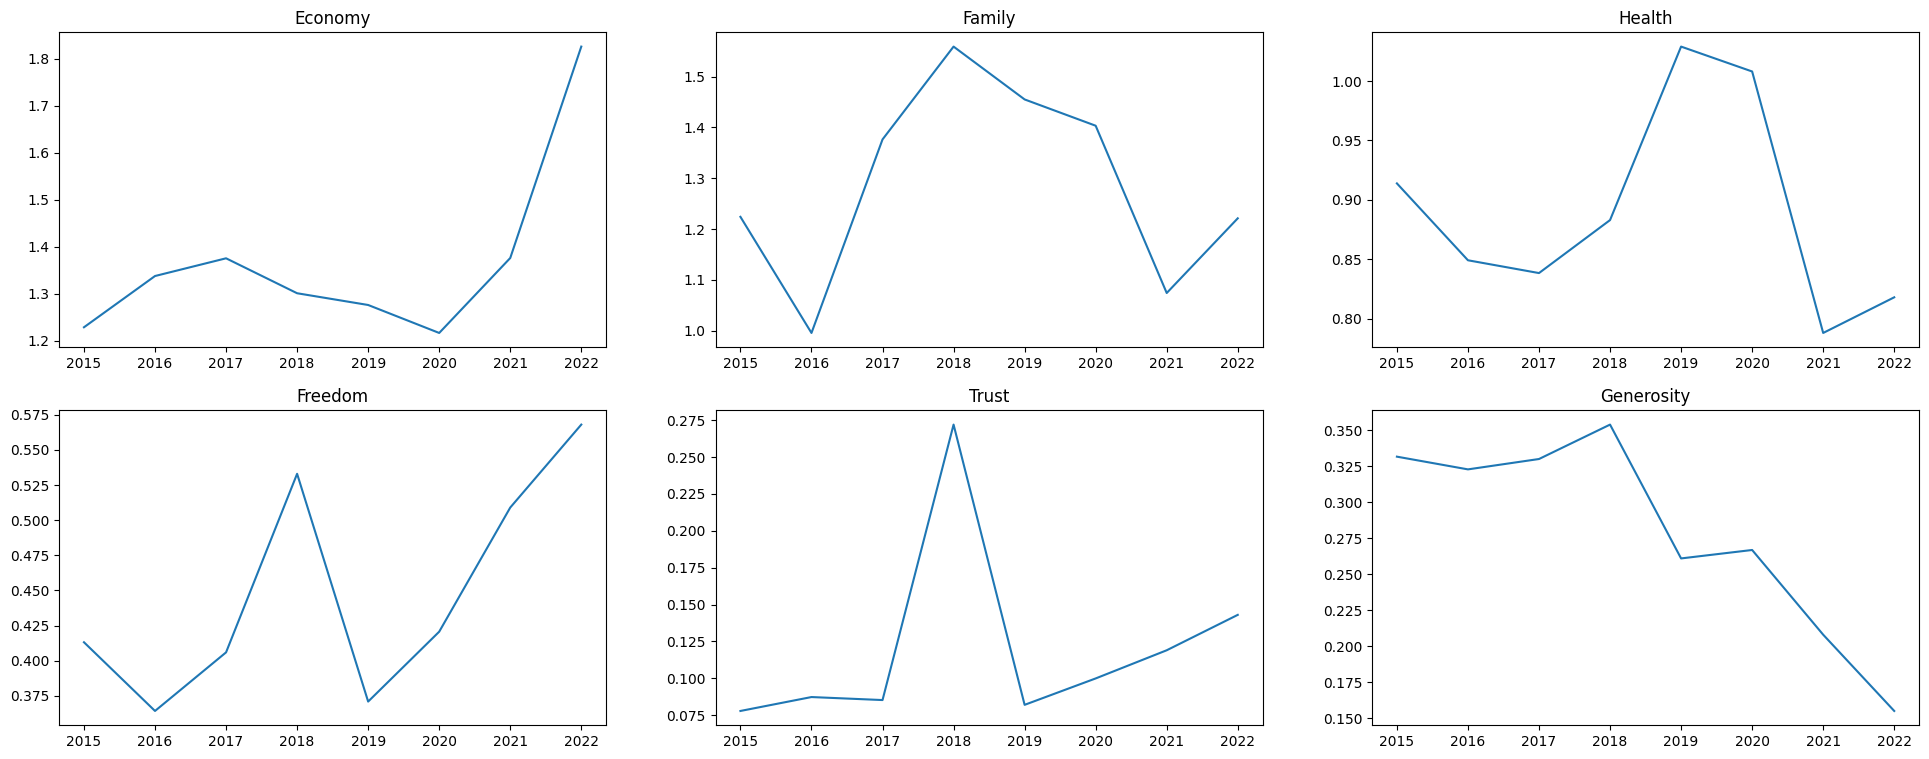

In [31]:
EconomyIl=df_Happy.loc[(df_Happy['Country'] == 'Israel')][['Economy']]
EconomyIlLst = EconomyIl.Economy.tolist()

FamilyIl=df_Happy.loc[(df_Happy['Country'] == 'Israel')][['Family']]
FamilyIlLst = FamilyIl.Family.tolist()

HealthIl=df_Happy.loc[(df_Happy['Country'] == 'Israel')][['Health']]
HealthIlLst = HealthIl.Health.tolist()

FreedomIl=df_Happy.loc[(df_Happy['Country'] == 'Israel')][['Freedom']]
FreedomIlLst = FreedomIl.Freedom.tolist()

TrustIl=df_Happy.loc[(df_Happy['Country'] == 'Israel')][['Trust']]
TrustIlLst = TrustIl.Trust.tolist()

GenerosityIl=df_Happy.loc[(df_Happy['Country'] == 'Israel')][['Generosity']]
GenerosityIlLst = GenerosityIl.Generosity.tolist()

Years=range(2015,2023)

fig, axes = plt.subplots(nrows=2, ncols=3 ,figsize=(24, 9))
axes[0,0].plot(Years, EconomyIlLst)
axes[0,1].plot(Years, FamilyIlLst)
axes[0,2].plot(Years, HealthIlLst)
axes[1,0].plot(Years, FreedomIlLst)
axes[1,1].plot(Years, TrustIlLst)
axes[1,2].plot(Years, GenerosityIlLst)

axes[0,0].title.set_text('Economy')
axes[0,1].title.set_text('Family')
axes[0,2].title.set_text('Health')
axes[1,0].title.set_text('Freedom')
axes[1,1].title.set_text('Trust')
axes[1,2].title.set_text('Generosity')

It appears that in 2018 there were actually some **maximum** peaks (`Family` , `Freedom` , `Trust` , `Generosity`) !

But we already learned that the most influencing factors are `Economy` and `Health` , and in those factors we weren't in the top..

> Remember that Israel got one of the highest rank in `Health` factor in 2022 ? 
>
> this is happening even while we are not in the best rank in **our** history..

So let's check maybe the means of the factors were irregular at 2018 :

C:\Users\avigu\AppData\Local\Temp\ipykernel_12228\1238313838.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  factorsMeans = df_Happy.groupby(['Year']).mean().reset_index()


<AxesSubplot: title={'center': 'Means over Years'}, xlabel='Year'>

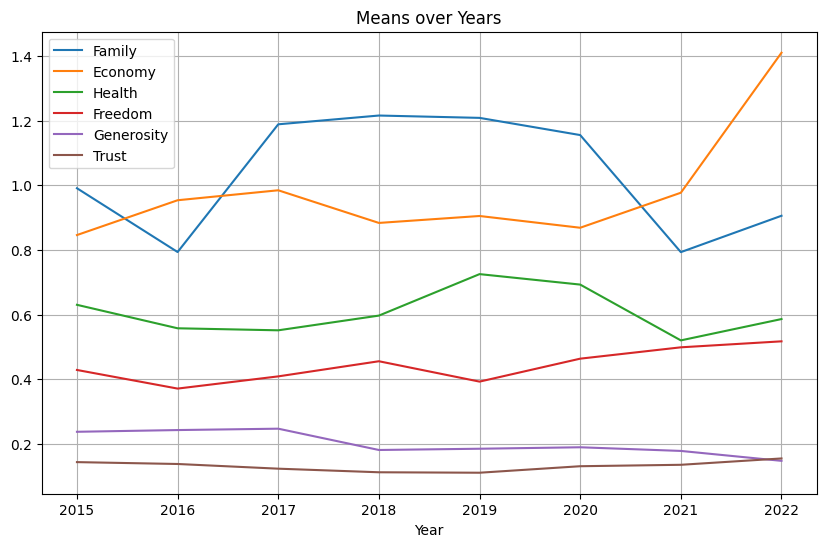

In [32]:
factorsMeans = df_Happy.groupby(['Year']).mean().reset_index()
factorsMeans.sort_values('Happiness_Score' , ascending=False )
factorsMeans.plot(x='Year', y=['Family', 'Economy' , 'Health', 'Freedom', 'Generosity' , 'Trust'] , figsize=(10,6) ,
                  grid= True , title = 'Means over Years')

We can see that the increases at 2018, were the `Freedom`, the `Family` and the `Health` factors, which are not significant. 

Therefore, I can't find the reason of Israel decrease in the happiness score.

Hypothesis: According the peaks in 2018 Israel factors graphs- maybe in 2018 the measurments were made in another way?

> By the way, we can notice that at 2020-2021 there were significant declines in `Health` and the `Family` factors. I think that the reason here is obvious: the covid 19 pandemic.

I'll take a look maybe ther was a great change in the number of countries at 2018, what cause this effect:

In [33]:
len(df_Happy[df_Happy['Year'] == 2017]['Country'].to_list())

155

In [34]:
len(df_Happy[df_Happy['Year'] == 2018]['Country'].to_list())

155

In [35]:
len(df_Happy[df_Happy['Year'] == 2019]['Country'].to_list())

156

No significant change.

C:\Users\avigu\AppData\Local\Temp\ipykernel_12228\1222243948.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  happinessMeans = df_Happy.groupby(['Year']).mean().reset_index()


<AxesSubplot: title={'center': 'Happiness means over Years'}, xlabel='Year'>

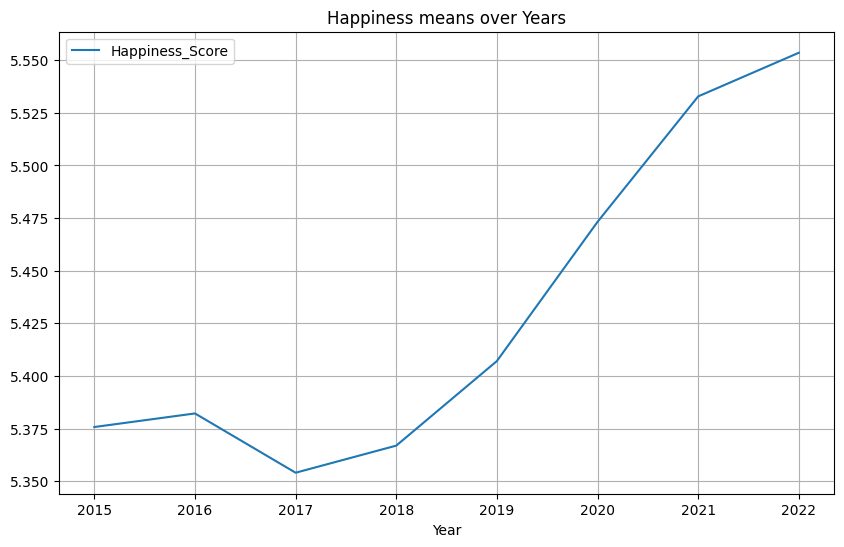

In [36]:
happinessMeans = df_Happy.groupby(['Year']).mean().reset_index()
happinessMeans.sort_values('Happiness_Score' , ascending=False )
happinessMeans.plot(x='Year', y=['Happiness_Score'] , figsize=(10,6) ,
                  grid= True , title = 'Happiness means over Years')

The happiness mean score in 2018 wasn't unusual, and also it can be concluded that the Covid-19 has indistinguishable effect about happiness! 

#### 2.

From the above graphs we can also see that Israel has a great leap in all factors in 2022 (except `Generosity`).

From the other hand, the total means of all factors increased this year (again, except `Generosity`).

So, I will check now maybe it's not us, but other countries are the reason:

In [37]:
df_Happy21.Country.head(12)

934        Finland
935        Denmark
936    Switzerland
937        Iceland
938    Netherlands
939         Norway
940         Sweden
941     Luxembourg
942    New Zealand
943        Austria
944      Australia
945         Israel
Name: Country, dtype: object

In [38]:
df_Happy22.Country.head(9)

1083        Finland
1084        Denmark
1085        Iceland
1086    Switzerland
1087    Netherlands
1088     Luxembourg
1089         Sweden
1090         Norway
1091         Israel
Name: Country, dtype: object

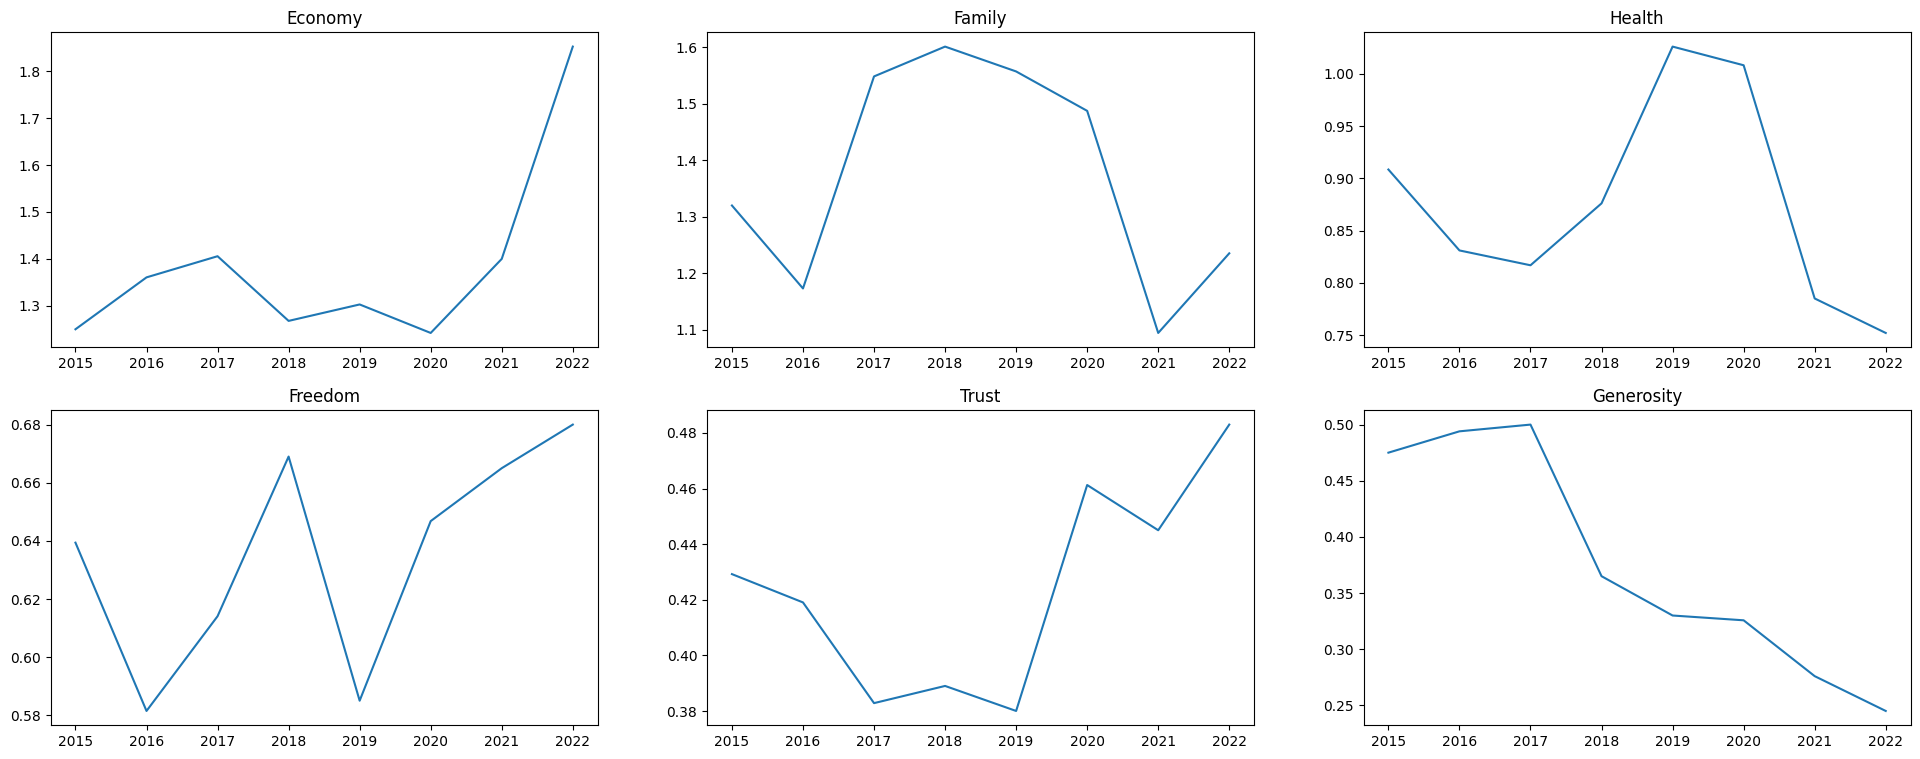

In [39]:
Economy=df_Happy.loc[(df_Happy['Country'] == 'New Zealand')][['Economy']]
EconomyLst = Economy.Economy.tolist()

Family=df_Happy.loc[(df_Happy['Country'] == 'New Zealand')][['Family']]
FamilyLst = Family.Family.tolist()

Health=df_Happy.loc[(df_Happy['Country'] == 'New Zealand')][['Health']]
HealthLst = Health.Health.tolist()

Freedom=df_Happy.loc[(df_Happy['Country'] == 'New Zealand')][['Freedom']]
FreedomLst = Freedom.Freedom.tolist()

Trust=df_Happy.loc[(df_Happy['Country'] == 'New Zealand')][['Trust']]
TrustLst = Trust.Trust.tolist()

Generosity=df_Happy.loc[(df_Happy['Country'] == 'New Zealand')][['Generosity']]
GenerosityLst = Generosity.Generosity.tolist()

Years=range(2015,2023)

fig, axes = plt.subplots(nrows=2, ncols=3 ,figsize=(24, 9))
axes[0,0].plot(Years, EconomyLst)
axes[0,1].plot(Years, FamilyLst)
axes[0,2].plot(Years, HealthLst)
axes[1,0].plot(Years, FreedomLst)
axes[1,1].plot(Years, TrustLst)
axes[1,2].plot(Years, GenerosityLst)

axes[0,0].title.set_text('Economy')
axes[0,1].title.set_text('Family')
axes[0,2].title.set_text('Health')
axes[1,0].title.set_text('Freedom')
axes[1,1].title.set_text('Trust')
axes[1,2].title.set_text('Generosity')

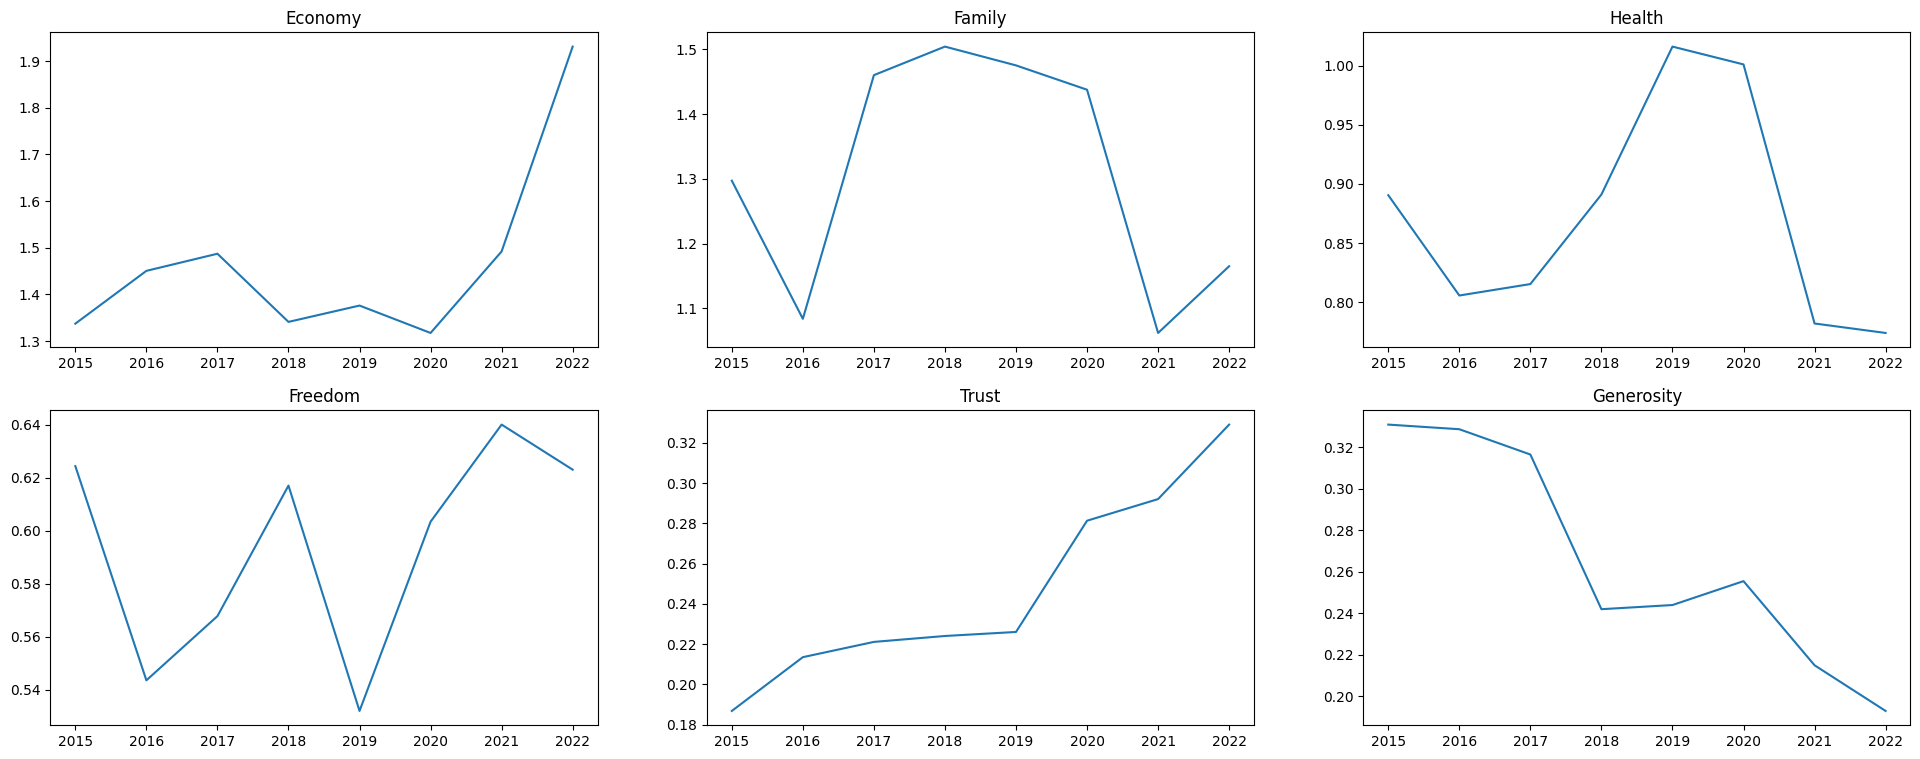

In [40]:
Economy=df_Happy.loc[(df_Happy['Country'] == 'Austria')][['Economy']]
EconomyLst = Economy.Economy.tolist()

Family=df_Happy.loc[(df_Happy['Country'] == 'Austria')][['Family']]
FamilyLst = Family.Family.tolist()

Health=df_Happy.loc[(df_Happy['Country'] == 'Austria')][['Health']]
HealthLst = Health.Health.tolist()

Freedom=df_Happy.loc[(df_Happy['Country'] == 'Austria')][['Freedom']]
FreedomLst = Freedom.Freedom.tolist()

Trust=df_Happy.loc[(df_Happy['Country'] == 'Austria')][['Trust']]
TrustLst = Trust.Trust.tolist()

Generosity=df_Happy.loc[(df_Happy['Country'] == 'Austria')][['Generosity']]
GenerosityLst = Generosity.Generosity.tolist()

Years=range(2015,2023)

fig, axes = plt.subplots(nrows=2, ncols=3 ,figsize=(24, 9))
axes[0,0].plot(Years, EconomyLst)
axes[0,1].plot(Years, FamilyLst)
axes[0,2].plot(Years, HealthLst)
axes[1,0].plot(Years, FreedomLst)
axes[1,1].plot(Years, TrustLst)
axes[1,2].plot(Years, GenerosityLst)

axes[0,0].title.set_text('Economy')
axes[0,1].title.set_text('Family')
axes[0,2].title.set_text('Health')
axes[1,0].title.set_text('Freedom')
axes[1,1].title.set_text('Trust')
axes[1,2].title.set_text('Generosity')

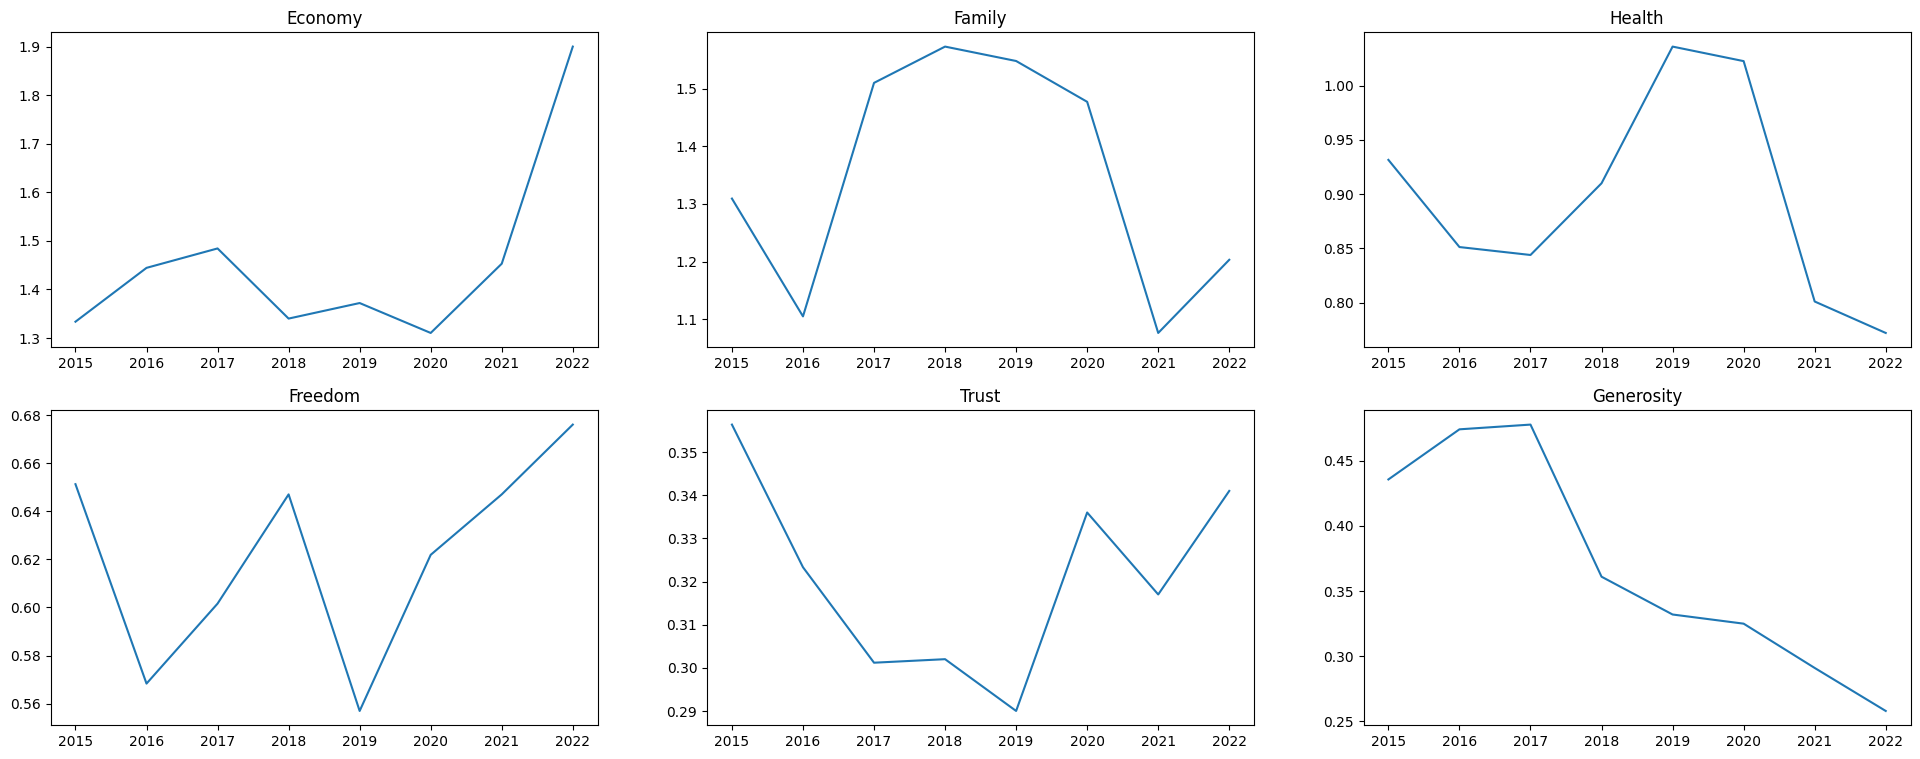

In [41]:
Economy=df_Happy.loc[(df_Happy['Country'] == 'Australia')][['Economy']]
EconomyLst = Economy.Economy.tolist()

Family=df_Happy.loc[(df_Happy['Country'] == 'Australia')][['Family']]
FamilyLst = Family.Family.tolist()

Health=df_Happy.loc[(df_Happy['Country'] == 'Australia')][['Health']]
HealthLst = Health.Health.tolist()

Freedom=df_Happy.loc[(df_Happy['Country'] == 'Australia')][['Freedom']]
FreedomLst = Freedom.Freedom.tolist()

Trust=df_Happy.loc[(df_Happy['Country'] == 'Australia')][['Trust']]
TrustLst = Trust.Trust.tolist()

Generosity=df_Happy.loc[(df_Happy['Country'] == 'Australia')][['Generosity']]
GenerosityLst = Generosity.Generosity.tolist()

Years=range(2015,2023)

fig, axes = plt.subplots(nrows=2, ncols=3 ,figsize=(24, 9))
axes[0,0].plot(Years, EconomyLst)
axes[0,1].plot(Years, FamilyLst)
axes[0,2].plot(Years, HealthLst)
axes[1,0].plot(Years, FreedomLst)
axes[1,1].plot(Years, TrustLst)
axes[1,2].plot(Years, GenerosityLst)

axes[0,0].title.set_text('Economy')
axes[0,1].title.set_text('Family')
axes[0,2].title.set_text('Health')
axes[1,0].title.set_text('Freedom')
axes[1,1].title.set_text('Trust')
axes[1,2].title.set_text('Generosity')

As it seems, while Israel had significally leap in all factors (except `Generosity` , but it's common for all my measured countries) , New Zealand and Australia have also decline in `Health (Life Expectancy)` ,and  Austria in `Health (Life Expectancy)` and `Freedom`. 

# External research

I wanted to check if I can convert this categorical variable (country) to a nominal variable, put on some axis, and check if it has some effect.


So, I decided to do it this way:

According to a research (https://gigazine.net/gsc_news/en/20191027-distance-from-equator-thinking/), there is a pattern between human well-being and the position of the country.
The main claim is, that The further the country is from the equator, the happier it's citizens.

I'll check if it can also be deduced from this data here:

First of all, I'll bring some external data, with the distances of every country from the equator.
Since there are countries where the area is not continuous, I chose to refer to the distance of the capital city of each country.
The data is from https://www.kaggle.com/datasets/nikitagrec/world-capitals-gps.

In [42]:
data_distances = pd.read_csv('https://raw.githubusercontent.com/avigmn/DataAnalysisCourse/main/concap.csv')
data_distances.head()

,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,Somaliland,Hargeisa,9.550000,44.050000,NaN,Africa
1,South Georgia and South Sandwich Islands,King Edward Point,-54.283333,-36.500000,GS,Antarctica
2,French Southern and Antarctic Lands,Port-aux-Français,-49.350000,70.216667,TF,Antarctica
3,Palestine,Jerusalem,31.766667,35.233333,PS,Asia
4,Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe


In [43]:
data_distances = data_distances[["CountryName", "CapitalLatitude"]]
data_distances.head()

,CountryName,CapitalLatitude
0,Somaliland,9.550000
1,South Georgia and South Sandwich Islands,-54.283333
2,French Southern and Antarctic Lands,-49.350000
3,Palestine,31.766667
4,Aland Islands,60.116667


In [44]:
new_distances = data_distances.copy()
new_distances['CapitalLatitude'] = data_distances['CapitalLatitude'].abs()
new_distances.columns = ['Country' , 'Distance_from_Equator']
new_distances.head()

,Country,Distance_from_Equator
0,Somaliland,9.550000
1,South Georgia and South Sandwich Islands,54.283333
2,French Southern and Antarctic Lands,49.350000
3,Palestine,31.766667
4,Aland Islands,60.116667


In [45]:
pd.isnull(new_distances).sum()

Country                  0
Distance_from_Equator    0
dtype: int64

In [46]:
full_df = pd.merge(df_Happy, new_distances, how = 'inner' , on = 'Country')
full_df.head()

,Happiness Rank,Country,Region,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Year,Distance_from_Equator
0,1,Switzerland,Western Europe,7.587,1.39651,1.349510,0.941430,0.665570,0.419780,0.296780,2015,46.916667
1,2,Switzerland,Western Europe,7.509,1.52733,1.145240,0.863030,0.585570,0.412030,0.280830,2016,46.916667
2,4,Switzerland,Western Europe,7.494,1.56498,1.516912,0.858131,0.620071,0.367007,0.290549,2017,46.916667
3,5,Switzerland,Western Europe,7.487,1.42000,1.549000,0.927000,0.660000,0.357000,0.256000,2018,46.916667
4,6,Switzerland,Western Europe,7.480,1.45200,1.526000,1.052000,0.572000,0.343000,0.263000,2019,46.916667


<AxesSubplot: >

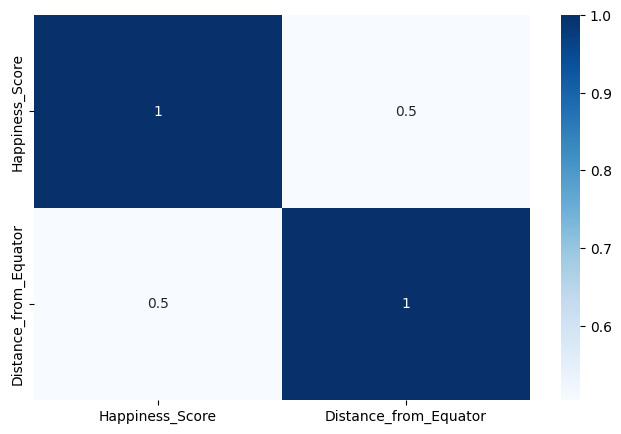

In [47]:
fig , axes = plt.subplots(nrows = 1, ncols = 1 , figsize = (8 , 5))
corrMtrx2 = full_df[['Happiness_Score' , 'Distance_from_Equator']].corr(method = 'pearson')
sns.heatmap(data = corrMtrx2 , cmap = 'Blues' , annot = True)

 We can see that the correlation is relatively high

### Conclusions :

In this project we saw some interesting facts :

* The factors with the best correlation with Happiness are `Economy` and `Health` , and this is consistent with Maslow's theory.

* Afghanistan is the less happier country in the world in the last years, most likely because their lately history.

* There's a chance that the data is not accurate enough, according to the findings about Cambodia, Rwanda and 2018 results.

* Israel is one of the countries with the highest Life Expectancy and happiness score in the whole world!

* The Covid-19 pandemic couse to decline in `Health (Life Expectancy)` and the `Family (Social Support)` factors, maybe caused an increase in `Economy (GDP per Capita)` factor, and had no distinguishable effect on `Happiness Score` !

* The further a country is from the equator, the happier it will be!